In [2]:
import opinion as op
import numpy as np
from scipy.optimize import root

In [3]:
Y0 = np.array([0.0,4.0,5.0,6.0,10.0,11.0,12.0])
P0 = np.array([-0.44,1.82]) # from previous run, without saturation

tf = np.array([20.0])
Z0 = np.concatenate((P0,tf))

eta = 0.5
sat = 2.0
mu = 1.0

## Initial Problem

    fjac: array([[-7.28819644e-04, -6.46166375e-01, -7.63196230e-01],
       [ 5.35553570e-02, -7.62126376e-01,  6.45209431e-01],
       [ 9.98564616e-01,  4.04030053e-02, -3.51611236e-02]])
     fun: array([ 3.23074900e-14, -2.73165492e-08, -1.11745986e-08])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([ 1.52818878e-06,  8.50649004e-07, -4.45045910e-08])
       r: array([ 2.21764364e+03,  9.25642032e+02,  1.18783806e-01, -1.47354608e+01,
       -5.93454366e-01,  3.19149767e-02])
  status: 1
 success: True
       x: array([-0.44230164,  1.8230263 , 12.5302511 ])


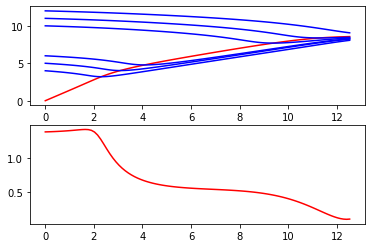

In [4]:
sol = root(op.F_zero,Z0,args=(Y0,eta,mu,sat))
Z0 = sol.x
print(sol)  
op.trace(Z0,Y0,mu,sat)

## Continuation on control

0.18999999999999928
    fjac: array([[-1.55686661e-07, -7.09060142e-01, -7.05148009e-01],
       [-5.12856296e-05, -7.05148008e-01,  7.09060141e-01],
       [ 9.99999999e-01, -3.62743508e-05,  3.62548137e-05]])
     fun: array([ 0.05769731, -0.0821154 ,  0.06617052])
 message: 'The solution converged.'
    nfev: 157
     qtf: array([0.01156474, 0.10481943, 0.05770269])
       r: array([ 1.39776273e+07,  8.27430815e+06,  2.39317161e+00,  1.85883993e+04,
       -6.38937230e-01, -3.18416743e-05])
  status: 1
 success: True
       x: array([-0.85567918,  1.55322742, 11.3331829 ])


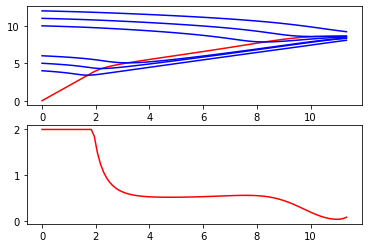

In [5]:
mu_end = 0.19
mu_step = 0.01

while mu > mu_end:
    mu = mu-mu_step    
    sol = root(op.F_zero,Z0,args=(Y0,eta,mu,sat))
    Z0 = sol.x
    
#     print(mu)
#     print(sol)
#     op.trace(Z0,Y0,mu,sat)

print(sol)
op.trace(Z0,Y0,mu,sat)